# Methods for Data Science: Course Work 1

## Task 1:  Regression (50 marks)

#### 1.1 Linear regression (8 marks)  

1.1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import seaborn as sns

Below are functions which we repeatedly use throughout this notebook.

In [2]:
# We might need to standardise our data so we define a function standardise.

def standardise(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    return (X - mu) / sigma

In [3]:
# We need to split the data in cross-validation

def cross_val_split(N, num_folds):
    fold_size = N // num_folds
    index_perm = np.random.permutation(np.arange(N))
    folds = []
    for k in range(num_folds):
        folds.append(index_perm[k*fold_size:(k+1)*fold_size])
    return folds

In [4]:
# Read in both train and test data.
# The test_data will not be used in any in-sample learning !

train_data = pd.read_csv("./airfoil_noise_samples.csv")
test_data = pd.read_csv("./airfoil_noise_test.csv")
train_data

,Frequency,Angle,Displacement,Chord length,Velocity,Thickness,Sound Pressure
0,2175.611424,15.138865,21.075119,0.088194,66.764401,0.044771,122.365215
1,2962.923620,13.400893,13.200889,0.048462,78.221903,0.011041,129.296236
2,4430.810843,2.164599,13.959536,0.226743,57.053201,0.011499,121.827380
3,4939.695645,13.857682,18.203793,0.021705,23.896377,0.021475,114.998132
4,2193.979785,9.298757,11.007713,0.052737,38.917034,0.001741,125.639641
...,...,...,...,...,...,...,...
3885,3905.607276,9.799786,11.765429,0.028704,67.798053,0.004488,125.085653
3886,64.227331,2.707020,14.811376,0.235426,31.178047,0.001760,123.172927
3887,3284.747651,0.569689,0.340812,0.040439,49.229545,0.002682,134.214100
3888,5335.315242,5.525639,15.952651,0.197330,31.902680,0.008405,116.550551


We consider a linear regression problem of the form
$$
y = \boldsymbol X\boldsymbol\beta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol X\in\mathbb{R}^{3890 \times 7}$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\beta\in\mathbb{R}^7$ parametrizes the function.

The intercept term $\beta_{0}$ will be included by inserting a vector of ones as the first column of X.

In [5]:
# Construct the dataframes (i.e. vector y and design matrix X) and standardise them.
# Standardising has many benefits, one being that it makes the data more comparable and easier to work with.
# Note for linear models if we standardise the design matrix we must standardise the response variables.

y_train = standardise(train_data.loc[:, "Sound Pressure"].to_numpy())
X_train = standardise(train_data.iloc[:, 0:6].to_numpy())

# Insert 1 at the start of every row for intercept beta_0
X_train_intercept = np.hstack((np.ones((len(X_train),1)), X_train))

From lectures we know that: 

$$
\boldsymbol\beta^{*} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \ \in\mathbb{R}^D\,,
$$

minimises the loss function. The factor of $\frac{1}{2N}$ doesn't affect this result.

In [6]:
# define function which computes the MLE given a design matrix and vector of response variables.

def MLE(X, y):
    
    """"compute beta_MLE for a set of data.
        inputs:
        
        y: vector length N
        X: matrix size N x D
        
        returns:
        beta_MLE: vector length D"""
    
    N = len(y)
    X_pseudo = np.linalg.inv(X.T @ X) @ X.T
    beta_MLE = X_pseudo @ y
    return beta_MLE

MLE(X_train_intercept, y_train)

array([-1.82520015e-15, -7.48825212e-01,  1.74766803e-01, -8.22786353e-01,
       -1.64057258e-02,  3.61261966e-01, -2.84061615e-03])

In [7]:
# Compute the in-sample MSE and R^2 for the dataset

beta = MLE(X_train_intercept, y_train)
y_pred = X_train_intercept @ beta
y_bar = np.mean(y_train)

MSE = np.mean((y_train - y_pred) ** 2)
TSS = np.mean((y_train - y_bar) ** 2)

R_2 = 1 - (MSE / TSS)

print("The in-sample MSE and R^2 values are {} and {} respectively.".format(MSE, R_2))

The in-sample MSE and R^2 values are 0.08226560227369234 and 0.9177343977263077 respectively.


1.1.2

In [8]:
# create test dataframes

y_test = standardise(test_data.loc[:, "Sound Pressure"].to_numpy())
X_test = standardise(test_data.iloc[:, 0:6].to_numpy())
X_test_intercept = np.hstack((np.ones((len(X_test),1)), X_test ))

y_pred_test = X_test_intercept @ beta
y_bar_test = np.mean(y_test)

MSE_test = np.mean((y_test - y_pred_test) ** 2)
TSS_test = np.mean((y_test - y_bar_test) ** 2)

R_2_test = 1 - (MSE_test / TSS_test)

print("The out-sample MSE and R^2 are {} and {} respectively.".format(MSE_test, R_2_test))

The out-sample MSE and R^2 are 0.09139155601587617 and 0.9086084439841238 respectively.


The MSE and $R^2$ between the train and test data are very similar which implies that the model is performing well and is able to generalize to new data. This is also a good sign that the model is not underfitting or overfitting the training data. 

Plus, the $R^2$ is close to 1 and the MSE is very small, which both indicate that the model we have fitted explains the data well.

#### 1.2 Lasso regression (12 marks) 

1.2.1

In [9]:
# Create copies of the previous dataset. 
# The reason we do this is that it is easier to keep track of which data is for which task.
# Note that these are already standardised and contain a column of ones at the start of the matrix.

X_train_lasso = X_train_intercept
X_test_lasso = X_test_intercept

y_train_lasso = y_train
y_test_lasso = y_test

In [10]:
# Now in order to perform gradient descent on this loss function we need to calculate its gradient.
# The function below calculates the gradient and returns the grad vector.

def loss_gradient_lasso(beta, X, y, lam):
    
    N = len(y)
    y_pred = X @ beta
    diff = y - y_pred
    sgn = np.sign(beta)
    
    # So we don't add the intercept term.
    sgn[0] = 0
    
    grad =  - 1 / N * (X.T @ diff) + lam * sgn
    
    return grad
    

In [11]:
# Now we have to perform gradient descent using the non-constant learning rate and the grad vector from above.
# We output the optimal vector of coefficients for this regularisation parameter lambda.

def gradient_descent_lasso(X, y, lam, max_iter=500, tol=1e-4):
    
    # initialise beta and the learning rate
    beta = np.ones(X.shape[1])
    alpha = 1
    it = 0
    
    
    # Run gradient descent while not exceeding the maximum iterations.
    while it <= max_iter:
        
        prev_beta = beta.copy()
        it += 1
        beta -= alpha / it * (loss_gradient_lasso(beta, X, y, lam))
        
        # Check for convergence by seeing if the change in beta is minimal
        diff = np.linalg.norm(beta - prev_beta)
        if diff < tol:
            break
    
    return beta  

print(gradient_descent_lasso(X_train_lasso, y_train_lasso, 0.01))

[-1.79765305e-15 -7.30574504e-01  1.78717957e-01 -8.04084137e-01
 -5.29123723e-03  3.44570037e-01 -1.14972116e-02]


In [12]:
# We calculate the MSE and run a T-fold cross-validation search to tune the hyperparameter.

def MSE_lasso(X_test, y_test, beta):
    y_pred = X_test @ beta
    return np.mean((y_pred - y_test) ** 2)

def cross_validation_lasso(X_train, y_train, folds, lam):
    MSE_l = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]


        X_val_i = X_train[val_indexes, :]
        y_val_i = y_train[val_indexes]
        
        beta = gradient_descent_lasso(X_train_i, y_train_i, lam)
        
        MSE_i = MSE_lasso(X_val_i, y_val_i, beta)
        MSE_l.append(MSE_i)

    # Return the average MSE across the T-folds.
    return sum(MSE_l) / len(MSE_l)

The optimal lambda is 0.0023729483883725526


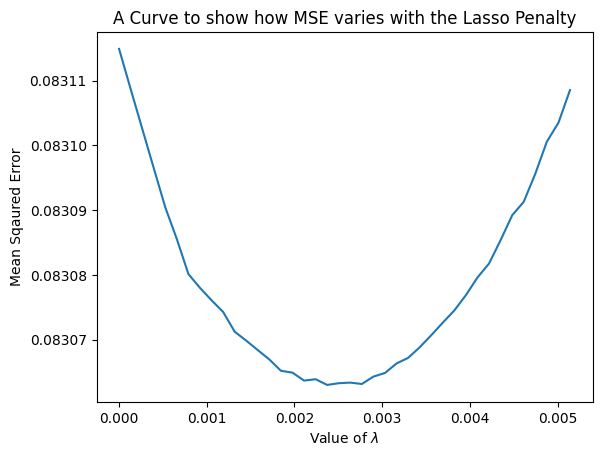

In [13]:
# In order to plot the average MSE against the lambdas we need to create an array of MSEs
# which correspond to the lambda.

MSE_arr = np.array([])

# We use a 5-fold cross validation split.
# NOTE: this function can be found at the start of the notebook.
folds = cross_val_split(len(y_train_lasso), 5)

for lam in np.linspace(0, 20, 40) / X_train_lasso.shape[0]:
    MSE = cross_validation_lasso(X_train_lasso, y_train_lasso, folds, lam)
    MSE_arr = np.append(MSE_arr, MSE)

plt.plot(np.linspace(0, 20, 40) / X_train_lasso.shape[0], MSE_arr)
plt.title("A Curve to show how MSE varies with the Lasso Penalty")
plt.ylabel("Mean Sqaured Error")
plt.xlabel("Value of $\lambda$")


# perform grid search to find the best lambda.

ind = np.argmin(MSE_arr)
optimal_lam = np.linspace(0, 20, 40)[ind] / X_train_lasso.shape[0]
print("The optimal lambda is {}".format(optimal_lam))

1.2.2

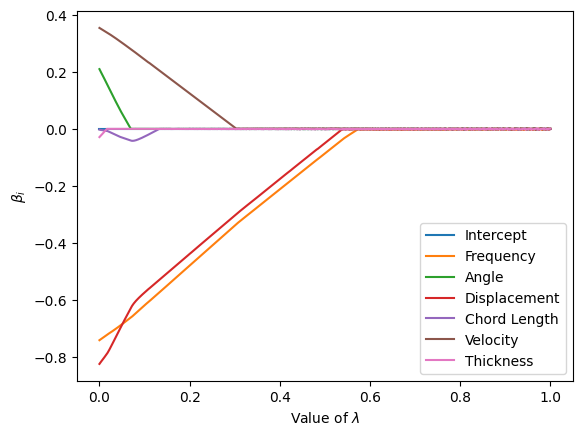

In [14]:
lam_range = np.linspace(0, 1, 1000)

beta_arr = np.array([gradient_descent_lasso(X_train_intercept, y_train_lasso, lam) for lam in lam_range])

intercept = beta_arr[:, 0]
frequency = beta_arr[:, 1]
angle = beta_arr[:, 2]
displacement = beta_arr[:, 3]
chord_length = beta_arr[:, 4]
velocity = beta_arr[:, 5]
thickness = beta_arr[:, 6]

plt.plot(lam_range, intercept, label="Intercept")
plt.plot(lam_range, frequency, label="Frequency")
plt.plot(lam_range, angle, label="Angle")
plt.plot(lam_range, displacement, label="Displacemt")
plt.plot(lam_range, chord_length, label="Chord Length")
plt.plot(lam_range, velocity, label="Velocity")
plt.plot(lam_range, thickness, label="Thickness")
plt.ylabel(r"$\beta_{i}$")
plt.xlabel(r"Value of $\lambda$")
plt.legend(['Intercept', 'Frequency', 'Angle', 'Displacement', 'Chord Length', 'Velocity', 'Thickness'])

From the plot above we can see that as the Lasso Penalty $\lambda$ increases it shrinks the values of each component of $\beta$ and sets some of them to zero, as expected. This is to reduce overfitting, which in turn reduces the MSE and thus the variance in the model - making it more generalizable.

1.2.3

In [15]:
# Find the optimal parameters and the predict y for the in-sample scores

beta_opt = gradient_descent_lasso(X_train_lasso, y_train_lasso, optimal_lam)

MSE_in = MSE_lasso(X_train_lasso, y_train_lasso, beta_opt)

def R_2_lasso(X, y, beta):
    y_bar = np.mean(y)
    TSS = np.mean((y - y_bar) ** 2)
    MSE = MSE_lasso(X, y, beta)
    return 1 - (MSE / TSS)

R_2_in = R_2_lasso(X_train_lasso, y_train_lasso, beta_opt)

MSE_out = MSE_lasso(X_test_lasso, y_test_lasso, beta_opt)
R_2_out = R_2_lasso(X_test_lasso, y_test_lasso, beta_opt)

print(r"The in-sample MSE is {} and the R^2 is {}".format(MSE_in, R_2_in))
print(r"The out-sample MSE is {} and the R^2 is {}".format(MSE_out, R_2_out))

The in-sample MSE is 0.0827316304726995 and the R^2 is 0.9172683695273005
The out-sample MSE is 0.09145311070943517 and the R^2 is 0.9085468892905648


#### 1.3 Elastic Nets (20 marks) 
1.3.1

In [16]:
# Create copies of the dataset for elastic nets.

X_train_EN = X_train_intercept
X_test_EN = X_test_intercept

y_train_EN = y_train
y_test_EN = y_test

In [17]:
# Just like we did for the lasso regression we have to calculate the gradient of our new loss function.
# We return the gradient vector.

def loss_gradient_EN(beta, X, y, lam, alpha):
    
    N = len(y)
    y_pred = X @ beta
    diff = y - y_pred
    sgn = np.sign(beta)
    
    # so that we don't add the intercept term.
    sgn[0] = 0
    
    
    grad = - (1 / N) * (X.T @ diff) + lam * (alpha * sgn + 2 * (1 - alpha) * beta)
    
    return grad

In [18]:
# Now we perform gradient descent again just like we did for lasso, just with another parameter.
# This time alpha is not the learning-rate.

def gradient_descent_EN(X, y, lam, alpha, max_iter=500, tol=1e-4):
    
    # initialise beta and the learning rate
    beta = np.ones(X.shape[1])
    lr = 1
    it = 0
    
    
    # Run gradient descent while not exceeding the maximum iterations.
    while it <= max_iter:
        
        prev_beta = beta.copy()
        it += 1
        beta -= lr / it * (loss_gradient_EN(beta, X, y, lam, alpha))
        
        # Check for convergence by seeing if the change in beta is minimal
        diff = np.linalg.norm(beta - prev_beta)
        if diff < tol:
            break
    
    return beta

# Return the predicted y's given the optimal beta.
def predict_EN(X, beta):
    return X @ beta

1.3.2

In [19]:
# We create folds and run a 5-fold cross_validation.

def MSE_EN(X, y, beta):
    y_pred = predict_EN(X, beta)
    return np.mean((y_pred - y) ** 2)

folds = cross_val_split(len(y_train_EN), 5)

def cross_validation_EN(X_train, y_train, folds, lam, alpha):
    MSE_l = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]


        X_val_i = X_train[val_indexes, :]
        y_val_i = y_train[val_indexes]
        
        beta = gradient_descent_EN(X_train_i, y_train_i, lam, alpha)
        
        MSE_i = MSE_EN(X_val_i, y_val_i, beta)
        MSE_l.append(MSE_i)

    # Return the average MSE across the T-folds.
    return sum(MSE_l) / len(MSE_l)

In [20]:
# We are doing a grid search across alphas and lambdas, but we only need to optimise lambda in the question.
# Therefore, we will only return the best lambdas in an array.

def grid_search_EN(X, y, folds, lam_range, alpha_range):
    
    lam_arr = np.array([])
    
    for alpha in alpha_range:
        best_lam_score = np.inf
        best_lam = 0
        for lam in lam_range:
            lam_score = cross_validation_EN(X, y, folds, lam, alpha)
            if lam_score < best_lam_score:        
                best_lam_score, best_lam = lam_score, lam
        
        # After finding the most optimal lambda append it to the lambda array.
        # Then move onto the next alpha.
        lam_arr = np.append(lam_arr, best_lam)
    
    return lam_arr

folds = cross_val_split(len(y_train_EN), 5)

lam_range = np.linspace(0, 20, 40) / X_train_lasso.shape[0]
lam_arr = grid_search_EN(X_train_EN, y_train_EN, folds, lam_range, [0.1, 0.5, 0.9])
print(grid_search_EN(X_train_EN, y_train_EN, folds, lam_range, [0.1, 0.5, 0.9]))

# Calulates the R^2 score for the elastic net. 
def R_2_EN(X, y, beta):
    y_bar = np.mean(y)
    TSS = np.mean((y - y_bar) ** 2)
    MSE = MSE_EN(X, y, beta)
    return 1 - (MSE / TSS)


# Report the out_sample MSE and R^2 scores
for alpha, lam in zip([0.1, 0.5, 0.9], lam_arr):
    beta_best = gradient_descent_EN(X_train_EN, y_train_EN, lam, alpha)
    MSE_EN_out = MSE_EN(X_test_EN, y_test_EN, beta_best)
    R_2_EN_out = R_2_EN(X_test_EN, y_test_EN, beta_best)
        
    print("The out-sample MSE and R^2 for lambda {} and alpha {} is {} and {} respectively.".format(
        np.round(lam, 5), alpha, format(np.round(MSE_EN_out, 5)), format(np.round(R_2_EN_out, 5))))

[0.         0.00092281 0.00210929]
The out-sample MSE and R^2 for lambda 0.0 and alpha 0.1 is 0.09171 and 0.90829 respectively.
The out-sample MSE and R^2 for lambda 0.00092 and alpha 0.5 is 0.09168 and 0.90832 respectively.
The out-sample MSE and R^2 for lambda 0.00211 and alpha 0.9 is 0.09152 and 0.90848 respectively.


We can deduce that $\alpha = 0.9$ is narrowly the optimal alpha.

1.3.3

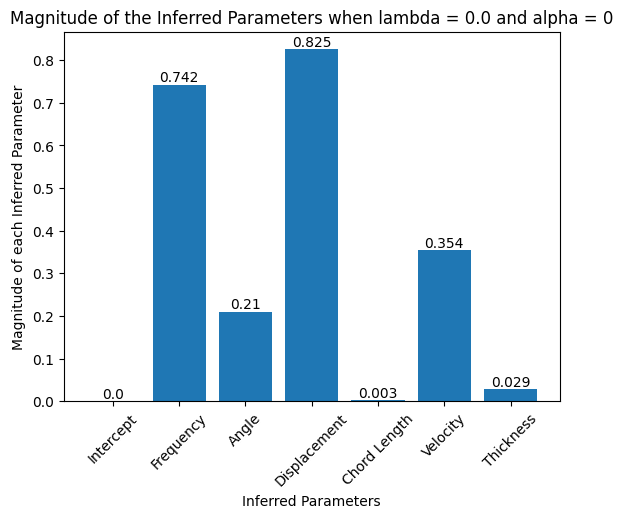

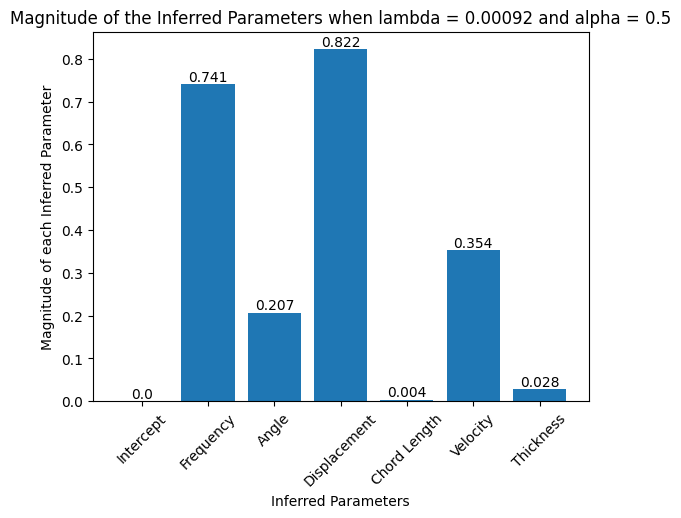

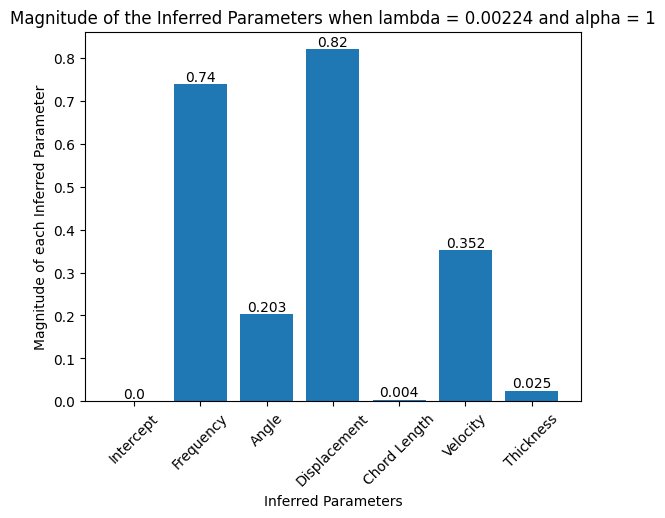

In [21]:
lam_range = np.linspace(0, 20, 40) / X_train_lasso.shape[0]
lam_arr = grid_search_EN(X_train_EN, y_train_EN, folds, lam_range, [0, 0.5, 1])

for alpha, lam, in zip([0, 0.5, 1], lam_arr):
    
    beta = np.array(gradient_descent_EN(X_train_EN, y_train_EN, lam, alpha))
    
    labels = ["Intercept", "Frequency", "Angle", "Displacement", "Chord Length", "Velocity", "Thickness"]
    
    fig, ax = plt.subplots()
    ax.bar(labels, np.abs(beta))
    ax.set_xlabel('Inferred Parameters')
    ax.set_ylabel('Magnitude of each Inferred Parameter')
    ax.set_title(f'Magnitude of the Inferred Parameters when lambda = {np.round(lam, 5)} and alpha = {alpha}')
    plt.xticks(rotation=45)
    
    for i, val in enumerate(np.abs(beta)):
        ax.text(i, val, str(round(val,3)), ha='center', va='bottom')
    
    plt.show()
    

The case where $\alpha = 0$ is when we solely perform ridge regression, likewise the case where $\alpha = 1$ is when we solely perform lasso regression. Finally when $\alpha = 0.5$ we give equal importance to both lasso and ridge regression. The fact that the magnitude of the vectors change very little implies that not one method majorly outperforms the other.

#### 1.4 kNN regression (10 marks)
1.4.1

In [22]:
# We have already standardised our data in the linear regresion task!
X_train_kNN = X_train
X_test_kNN = X_test

y_train_kNN = y_train
y_test_kNN = y_test

In [23]:
# Recall that kNN relies on the euclidian distance between two points

def euclidian_distance(p, q):
    return np.sqrt(np.sum((p-q)**2, axis=1))

kNN regression relies on finding the k-nearest $y$ neighbours to a particular $x_{in}$ and then assigning the mean of those neighbours as the response variable or $y_{new}$ which corresponds to $x_{in}$

In [24]:
# Now we define a function which finds the k nearest neighbours to a point

def k_neighbours(X_train, X_test, k, return_distance=False):
    n_neighbours = k
    dist = []
    neigh_ind = []

    # compute distance from each point x_test in X_test to all points in X_train
    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test] 

    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)

    # return distances together with indices of k nearest neighbours
    if return_distance:
        return np.array(dist), np.array(neigh_ind)

    return np.array(neigh_ind)

In [25]:
# Here we find the predicted values using the k_neihgbours model.

def reg_predict(X_train, y_train, X_test, k):
    # Each of the k neighbours contributes equally to the prediction of any data point in X_test  
    neighbours = k_neighbours(X_train, X_test, k=k)
    
    # Compute mean over neighbours labels
    y_pred = np.array([np.mean(y_train[neighbour]) for neighbour in neighbours])

    return y_pred

Now in order to train the model we need to use cross-validation to find the best k, for which we use 5-fold cross-validation.

In [69]:
# We use cross_val_split defined at the start to get our fold indexes
folds = cross_val_split(X_train_kNN.shape[0], 5)

# We use MSE_kNN and cross_validation_kNN to find the best k.
def MSE_kNN(X_train, y_train, X_test, y_test, k):
    y_pred = reg_predict(X_train, y_train, X_test, k)
    return np.mean((y_pred - y_test) ** 2)

def cross_validation_kNN(X_train, y_train, folds, k):
    MSE_l = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]


        X_val_i = X_train[val_indexes, :]
        y_val_i = y_train[val_indexes]

        MSE_i = MSE_kNN(X_train_i, y_train_i, X_val_i, y_val_i, k=k)
        MSE_l.append(MSE_i)

    # Return the average score
    return sum(MSE_l) / len(MSE_l)

# This function finds the best k and uses cross_val_split which was defined at the start.
def choose_best_k(X_train, y_train, folds, k_range):
    k_MSE = np.zeros((len(k_range),))

    for i, k in enumerate(k_range):
        k_MSE[i] = cross_validation_kNN(X_train, y_train, folds, k)
        print(f'CV_MSE@k={k}: {k_MSE[i]:.3f}')
        
        # We want to minimise the MSE
        best_k_index = np.argmin(k_MSE)
    return k_range[best_k_index]

k = choose_best_k(X_train_kNN, y_train_kNN, folds, np.arange(1, 21))
print("The best k is {}".format(k))

MSE_kNN = MSE_kNN(X_train_kNN, y_train_kNN, X_test_kNN, y_test_kNN, k=k)
print("The out-sample MSE is {}".format(MSE_kNN))

CV_MSE@k=1: 0.231
CV_MSE@k=2: 0.171
CV_MSE@k=3: 0.149
CV_MSE@k=4: 0.142
CV_MSE@k=5: 0.136
CV_MSE@k=6: 0.133
CV_MSE@k=7: 0.132
CV_MSE@k=8: 0.132
CV_MSE@k=9: 0.130
CV_MSE@k=10: 0.130
CV_MSE@k=11: 0.131
CV_MSE@k=12: 0.131
CV_MSE@k=13: 0.131
CV_MSE@k=14: 0.132
CV_MSE@k=15: 0.133
CV_MSE@k=16: 0.133
CV_MSE@k=17: 0.134
CV_MSE@k=18: 0.134
CV_MSE@k=19: 0.135
CV_MSE@k=20: 0.136
The best k is 10
The out-sample MSE is 0.1357061206424599


1.4.2

The out-sample MSE for kNN (which we calculated above) is higher than the out-sample MSE from 1.1, 1.2 and 1.3 which could imply that the data follows more of a linear relationship.

## Task 2: Classification  (50 marks)



#### 2.1 Random forest (20 marks)
2.1.1

In [27]:
# Read in both train and test data.
# The test_data will not be used in any in sample learning !

train_data_rf = pd.read_csv("./diabetes_samples.csv")
test_data_rf = pd.read_csv("./diabetes_test.csv")
train_data_rf_1 = train_data_rf.set_index(train_data_rf['patient_number']).drop(train_data_rf.columns[0], axis=1)
test_data_rf_1 = test_data_rf.set_index(test_data_rf['patient_number']).drop(test_data_rf.columns[0], axis=1)

In [28]:
train_data_rf_1.replace(["No diabetes", "Diabetes"], [0, 1], inplace=True)
test_data_rf_1.replace(["No diabetes", "Diabetes"], [0, 1], inplace=True)

train_data_rf_clean = train_data_rf_1
test_data_rf_clean = test_data_rf_1

# define a function to convert a single column to float format
def convert_to_float(df, column):
    df[column] = df[column].str.replace(',', '.').astype(float)

# loop over all columns in the train_data_clean and convert them to float format
for column in train_data_rf_clean.columns:
    if train_data_rf_clean[column].dtype == 'O':
        convert_to_float(train_data_rf_clean, column)
        
# same for test_data_clean
for column in test_data_rf_clean.columns:
    if test_data_rf_clean[column].dtype == object:
        convert_to_float(test_data_rf_clean, column)
        
test_data_rf_clean

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
patient_number,,,,,,,,,,,,,,
3,217,75,54,4.0,20,67,187,29.3,110,72,40,45,0.89,0
5,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,0
6,170,69,64,2.7,20,64,161,27.6,108,70,37,40,0.93,0
8,164,71,63,2.6,20,72,145,19.7,108,78,29,36,0.81,0
9,230,112,64,3.6,20,67,159,24.9,100,90,31,39,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,182,206,43,4.2,70,69,214,31.6,158,90,45,48,0.94,1
360,205,83,42,4.9,72,61,180,34.0,170,90,39,47,0.83,0
362,207,71,41,5.0,72,70,180,25.8,138,88,39,40,0.98,1


In [29]:
X_train_rf = train_data_rf_clean.iloc[:, :13]
y_train_rf = train_data_rf_clean.loc[:, "diabetes"]

# We need a dictionary indicating whether the column index maps to a 
# categorical feature or numerical
# In this example, all features are numerical (categorical=False)
columns_dict = {index: False for index in range(X_train_rf.shape[1])}

# We will use an equal weight distribution to begin with (it wasn't specified in the question)
N = len(y_train_rf)
training_weights = np.ones(N) / N

In [30]:
# Define a cross entropy function

def cross_entropy(y, sample_weights):
    """ 
    Calculate the cross entropy for labels.
    Arguments:
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
        (float): the Cross_entropy for y.
    """

    # count different labels in y，and store in label_weights
    # in our dataset the only labes are 0 and 1
    # initialize weights with zero for each distinct label.
    
    label_weights = {yi: 0 for yi in set(y)} 
    for yi, wi in zip(y, sample_weights):
        label_weights[yi] += wi

    total_weight = sum(label_weights.values())
    CE = 0
    for label, weight in label_weights.items():
        p = label_weights[label] / total_weight
        
        # using formula in the notes
        CE -= p * np.log(p)


    return CE

Next, we define a function to split the data samples based on a feature (column) and a value, just like we did on a previous problem sheet. The feature corresponds to the "j" and the value corresponds to the "s" in each split.

In [31]:
# A function which actually performs the split

def split_samples(X, y, sample_weights, column, value, categorical):
    """
    Return the split of data whose column-th feature:
    1. equals value, in case `column` is categorical, or
    2. less than value, in case `column` is not categorical (i.e. numerical)

    Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      column: the column of the feature for splitting.
      value: splitting threshold  the samples
      categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
      tuple(np.array, np.array): tuple of subsets of X splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of y splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of sample weights based on column-th value.
    """ 

    if categorical:
        left_mask =(X[:, column] == value)
    else:
        left_mask = (X[:, column] < value) # left_mask is a tuple
    

    # Note that "~" in Python acts as NOT, so ~left_mask gets all the row indexes which aren't in left_mask
  
    X_left, X_right = X[left_mask, :], X[~left_mask, :]
    y_left, y_right = y[left_mask], y[~left_mask]
    w_left, w_right  = sample_weights[left_mask], sample_weights[~left_mask]

    return (X_left, X_right), (y_left, y_right), (w_left, w_right)

In [32]:
# A function which finds the best value / "s" to consider when performing the split along a specific column / "j"

def CE_split_value(X, y, sample_weights, column, categorical):
    """
    Calculate the cross-entropy based on `column` with the split that minimizes the cross-entropy.
    Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      column: the column of the feature for calculating. 0 <= column < D
      categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
      (float, float): the resulted cross-entropy and the corresponding value used in splitting.
    """

    unique_vals = np.unique(X[:, column])
    
    # If there is only one unique value along a column then we have to choose this one.
    # So we make sure that we have more than one.
    
    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

    CE_val, threshold = np.inf, None # we want to minimise CE so we initialise it to infinity

    for value in unique_vals:
        # split the values of i-th feature and calculate the cost 
        (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, column, value, categorical)

        # If one of the two sides is empty, skip this split.
        if len(y_l) == 0 or len(y_r) == 0:
            continue

        p_left = sum(w_l)/(sum(w_l) + sum(w_r))
        p_right = 1 - p_left
    
        # Calculate the new CE after the split
        new_cost = p_left * cross_entropy(y_l, w_l) + p_right * cross_entropy(y_r, w_r)
    
        if new_cost < CE_val:
            CE_val, threshold = new_cost, value

    return CE_val, threshold

Below we have defined `CE_split_rf`. We have skipped out the step of creating a function `CE_split` because when constructing a random forest we have to account for feature bagging. This is where we choose a random subset of predictors or features to train the data on after bootstrapping. Therefore having an extra function `CE_split` which doesn't account for this is not necessary.

In [33]:
# choose the best column / "j" for the split by calculating the best "s" for each column.
# return the overall best pair so that we can construct the decision tree

def CE_split_rf(n_features, X, y, sample_weights, columns_dict):
    """
    Choose the best feature to split according to criterion.
    Args:
      n_features: number of sampled features.
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    Returns:
      (float, int, float): the minimized gini-index, the best feature index and value used in splitting.
    """
    
    # This is the extra step which accounts for feature bagging.
    columns = np.random.choice(list(columns_dict.keys()), n_features, replace=False)
    columns_dict = {c: columns_dict[c] for c in columns}

    # Initialize `split_column` to None, so if None returned this means there is no valid split 
    # at the current node.
    min_CE, split_column, split_val = np.inf, None, 0
    
    for column, categorical in columns_dict.items():
        
        # Skip column if samples are not seperable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue

        cross_entropy, val = CE_split_value(X, y, sample_weights, column, categorical)       
        if cross_entropy < min_CE:
            min_CE, split_column, split_val = cross_entropy, column, val

    return min_CE, split_column, split_val

Below we have defined a `majority_vote` and `classify` function. `majority_vote` calculates the majority label in a particular region of the data and `classify` then uses this to classify the new $x_{in}$ we want to predict. 

In [34]:
# We need a function to return the majority label so that we can classify the x_in

def majority_vote(y, sample_weights):
    """
    Return the label which appears the most in y.
    Args:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (int): the majority label
    """
    majority_label = {yi: 0 for yi in set(y)}

    for yi, wi in zip(y, sample_weights):
        majority_label[yi] += wi
    return max(majority_label, key=majority_label.get)

# Now we need a function which actually classifies a single sample, which is a row of the dataset.

def classify(tree, x):
    """
    Classify a single sample with the fitted decision tree.
    Args:
      x: ((pd.Dataframe) a single sample features, of shape (D,).
    Returns:
      (int): predicted testing sample label.
    """
    if tree['majority_label'] is not None: 
        return tree['majority_label']
    
    elif tree['categorical']:
        if x[tree['feature_index']] == tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)
    
    else:
        if x[tree['feature_index']] < tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)

Now we can go about building a tree, training and predicting our data.

In [35]:
def build_tree_rf(n_features, X, y, sample_weights, columns_dict, feature_names, depth,  
                  max_depth=10, min_samples_leaf=2):
    """Build the decision tree according to the data.
    Args:
      X: (np.array) training features, of shape (N, D).
      y: (np.array) vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      feature_names (list): record the name of features in X in the original dataset.
      depth (int): current depth for this node.
    Returns:
      (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
        1. 'feature_name': The column name of the split.
        2. 'feature_index': The column index of the split.
        3. 'value': The value used for the split.
        4. 'categorical': indicator for categorical/numerical variables.
        5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
        6. 'left': The left sub-tree with the same structure.
        7. 'right' The right sub-tree with the same structure.
      Example:
          mytree = {
              'feature_name': 'petal length (cm)',
              'feature_index': 2,
              'value': 3.0,
              'categorical': False,
              'majority_label': None,
              'left': {
                  'feature_name': str,
                  'feature_index': int,
                  'value': float,
                  'categorical': bool,
                  'majority_label': None,
                  'left': {..etc.},
                  'right': {..etc.}
              }
              'right': {
                  'feature_name': str,
                  'feature_index': int,
                  'value': float,
                  'categorical': bool,
                  'majority_label': None,
                  'left': {..etc.},
                  'right': {..etc.}
              }
          }
    """
    # Include a clause for the cases where (i) all lables are the same, (ii) depth exceed (iii) X is too small
    if len(np.unique(y)) == 1 or depth>=max_depth or len(X)<=min_samples_leaf: 
        return {'majority_label': majority_vote(y, sample_weights)}
    else:
        CE, split_index, split_val = CE_split_rf(n_features, X, y, sample_weights, columns_dict)

    # If CE is infinity, it means that samples are not seperable by the sampled features.
    if CE == np.inf:
        return {'majority_label': majority_vote(y, sample_weights)}

    categorical = columns_dict[split_index]

    (X_l, X_r), (y_l, y_r), (w_l, w_r) =  split_samples(X, y, sample_weights, split_index, split_val, categorical)

    # Notice how the left and right have build trees on them as well, so we are recursively calling this function
    # This is so that we create the branches.

    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'categorical': categorical,
        'majority_label': None,
        'left': build_tree_rf(n_features, X_l, y_l, w_l, columns_dict, feature_names, depth + 1, 
                              max_depth, min_samples_leaf),
        'right': build_tree_rf(n_features, X_r, y_r, w_r, columns_dict, feature_names, depth + 1, 
                               max_depth, min_samples_leaf)
    }

In [36]:
def train_rf(B, n_features, X, y,  columns_dict, max_depth, sample_weights=None):
    """
    Build the decision tree according to the training data.
    Args:
      B: number of decision trees.
      X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
      y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] <= C. Here C = 1.
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      sample_weights: weights for each samples, of shape (N,).
      depth = depth of each of the trees.
    """
    if sample_weights is None:
        # if the sample weights is not provided, we assume the samples have uniform weights
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
    else:
        sample_weights = np.array(sample_weights) / np.sum(sample_weights)

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []

    # The bootstrap step
    for _ in range(B):
        sample = np.random.choice(training_indices, N, replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        w_sample = sample_weights[sample]
        tree = build_tree_rf(n_features, X_sample, y_sample, w_sample, columns_dict, feature_names, depth=1,
                            max_depth = max_depth)
        trees.append(tree)

    return trees

In [37]:
def predict_rf(rf, X):
    """
    Predict classification results for X.
    Args:
      rf: A trained random forest through train_rf function.
      X: numpy_array testing sample features, of shape (N, D).
    Returns:
      (np.array): predicted testing sample labels, of shape (N,).
    """

    def aggregate(decisions):
        count = defaultdict(int)
        for decision in decisions:
            count[decision] += 1
        return max(count, key=count.get)

    if len(X.shape) == 1:
        return aggregate([classify(tree, X) for tree in rf])
    else:
        return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

Now we have to tune the hyperparameters (number of trees or B in `train_rf` and max_depth in `build_tree_rf`) using 4-fold cross-validation and grid search. 

We have to use $\textit{accuracy}$ to make our decision, recall that $accuracy = \frac{TP + TN}{N_{validation}}$.

We must also carefully choose the ranges for each hyperparameter. We don't want the maximum number of tress to be too large as it will take a long time to train and evaluate. We also don't want the maximum for the depth of trees to be a number larger than 10 because it could lead to overfitting and thus a poor generalization performance.

In [38]:
# First we start by defining rf_score which uses accuracy to give us a way of comparing 
# which hyperparameter is best.

def rf_score(rf, X_test, y_test):
    
    # Note that although we have called the arguments X_test and Y_test
    # when we perform cross-validation these will actually be validation sets
    # which will come from the training data.

    X = X_test.to_numpy()
    
    y_pred = predict_rf(rf, X)
    
    # Note: to get true positives and true negatives we just need to count all the values in y_pred which match
    # the values in y_test.
    
    num = np.sum(y_pred==y_test.to_numpy())
    N = len(y_test.to_numpy())

    return num / N

In [39]:
# Now we need to evaluate the cross_val score for both hyperparemeters

def cross_val_evaluate(data, num_folds, B, max_depth, sample_weights=None):
    folds = cross_val_split(data.shape[0], num_folds)

    train_scores = []
    val_scores = []

    for i in range(len(folds)):
        #print('Fold', i+1)

        val_indices = folds[i]
        # define the training set
        train_indices = list(set(range(data.shape[0])) - set(val_indices))

        X_train = data.iloc[train_indices,  :-1]
        y_train = data.iloc[train_indices, -1]

        # define the validation set
        X_val = data.iloc[val_indices,  :-1]
        y_val = data.iloc[val_indices, -1]
    
        n_features = int(np.sqrt(X_train.shape[1]))

        # train the model
        rf = train_rf(B, n_features, X_train, y_train,  columns_dict, max_depth, sample_weights)
        #print("Training finished.")

        # evaluate
        train_score = rf_score(rf, X_train, y_train)
        val_score = rf_score(rf, X_val, y_val)
        #print("Accuracy on training set #{}: {}".format(i+1, train_score))
        #print("Accuracy on validation set #{}: {}".format(i+1, val_score))

        train_scores.append(train_score)
        val_scores.append(val_score)

    return train_scores, val_scores

In [40]:
# Now we need to compute a grid search so that can we can find the optimal pair of hyperparameters.

def rf_grid_search(data, num_folds, B_range, max_depth_range, sample_weights=None):
    best_score = 0
    best_B = 0
    best_max_depth = 0
    
    for B in B_range:
        for max_depth in max_depth_range:
            train_scores, val_scores = cross_val_evaluate(data, num_folds, B, max_depth, sample_weights)
            mean_val_score = np.mean(val_scores)
            
            if mean_val_score > best_score:
                best_score = mean_val_score
                best_B = B
                best_max_depth = max_depth
    
    print("Best validation score: {}".format(best_score))
    print("Best number of trees: {}".format(best_B))
    print("Best maximum depth: {}".format(best_max_depth))
    
    return best_B, best_max_depth


# The increments are large in each of the ranges to reduce computation time.

print(rf_grid_search(train_data_rf_clean, 4, np.arange(10, 110, 10) , [2, 4, 6, 8, 10]))

Best validation score: 0.9154411764705883
Best number of trees: 40
Best maximum depth: 10
(40, 10)


2.1.2

We will use the output of `rf_grid_search` to retrain our data on the training data set. We will then use this model we have trained to predict the classification of the test data set. Then 

In [41]:
X_train_rf = train_data_rf_clean.iloc[:, :13]
y_train_rf = train_data_rf_clean.loc[:, "diabetes"]

X_test_rf = test_data_rf_clean.iloc[:, :13]
y_test_rf = test_data_rf_clean.loc[:, "diabetes"]

n_features_train = int(np.sqrt(X_train_rf.shape[1]))
n_features_test = int(np.sqrt(X_test_rf.shape[1]))

B, max_depth = rf_grid_search(train_data_rf_clean, 4, np.arange(10, 110, 10), [2, 4, 6, 8, 10])

train_forest = train_rf(B, n_features_train, X_train_rf, y_train_rf,  columns_dict, max_depth, sample_weights=None)

Best validation score: 0.9080882352941178
Best number of trees: 60
Best maximum depth: 10


Now we have to create functions which computes the $\textit{accuracy}$, $\textit{precision}$, $\textit{recall}$ and $\textit{F-score}$.

In [42]:
# We already have accuracy in rf_score so it is the same.

def accuracy(rf, X_test, y_test):
    
    X = X_test.to_numpy()
    
    y_pred = predict_rf(rf, X)
    
    num = np.sum(y_pred==y_test.to_numpy())
    N = len(y_test.to_numpy())

    return num / N

# Using the formulae in the notes we can define functions for precision, recall and F score.

def precision(rf, X_test, y_test):
    
    X = X_test.to_numpy()
    y = y_test.to_numpy()
    y_pred = predict_rf(rf, X)
    
    TP = np.sum((y_pred==1) & (y==1))
    FP = np.sum((y_pred==1) & (y==0))
    
    return TP / (TP + FP)

def recall(rf, X_test, y_test):
    
    X = X_test.to_numpy()
    y = y_test.to_numpy()
    y_pred = predict_rf(rf, X)
    
    TP = np.sum((y_pred==1) & (y==1))
    FN = np.sum((y_pred==0) & (y==1))
    
    return TP / (TP + FN)

def F_score(rf, X_test, y_test):
    
    X = X_test.to_numpy()
    y = y_test.to_numpy()
    y_pred = predict_rf(rf, X)
    
    num = precision(rf, X_test, y_test) * recall(rf, X_test, y_test)
    den = precision(rf, X_test, y_test) + recall(rf, X_test, y_test)
    
    return 2 * num / den

print(accuracy(train_forest, X_test_rf, y_test_rf))
print(precision(train_forest, X_test_rf, y_test_rf))
print(F_score(train_forest, X_test_rf, y_test_rf))

0.9316239316239316
0.8333333333333334
0.7142857142857143


The accuracy and precision scores are very high and so the model has a high level of correctness and a low level of false positives. The F-score is reasonably high as well which means that there is a reasonable balance between precision and recall i.e. the model is able to make accurate and complete decisions to a good extent.

2.1.3

In [43]:
# We print out the frequencies of 0s and 1s in the diabetes column

frequencies = train_data_rf_clean["diabetes"].value_counts(normalize=True)
frequencies

0    0.838828
1    0.161172
Name: diabetes, dtype: float64

Clearly our data is imbalanced as there are far more cases where the individual doesn't have diabetes than when they do have diabetes.

In [44]:
# Now we have to compute the weights in such a way that the frequencies of zeros and ones are equal in weighting.
# This can be achieved by doing 0.5 / frequency

weights = np.zeros(len(y_train_rf))
y = y_train_rf.to_numpy()

zero_ind = (y==0)

# If we do 0.5 / frequency we give equal importance to both classes.
weights[zero_ind] = 0.5 / frequencies[0]
weights[~zero_ind] = 0.5 / frequencies[1]

In [45]:
# Now we train the data using the weights we have just calculated. Then repeat task 2.1.1 and 2.1.2

train_forest_weighted = train_rf(B, n_features_train, X_train_rf, y_train_rf, columns_dict, max_depth, 
                                 sample_weights=weights)

# Task 2.1.1(i)
print(rf_grid_search(train_data_rf_clean, 4, np.arange(10, 110, 10), [2, 4, 6, 8, 10], weights))

# Task 2.1.1(ii)
print(accuracy(train_forest_weighted, X_test_rf, y_test_rf))
print(precision(train_forest_weighted, X_test_rf, y_test_rf))
print(F_score(train_forest_weighted, X_test_rf, y_test_rf))

Best validation score: 0.9080882352941176
Best number of trees: 80
Best maximum depth: 6
(80, 6)
0.9230769230769231
0.7692307692307693
0.6896551724137931
0.16117216117216118
0.16117216117216118


In [46]:
# First we need to replace the 0s and 1s in the predicted y with the probability of being in the positive class.
# To do this we edit our predict_rf function such that instead of classifying a row of data,
# we calculate the probability of assigning that row of data to the positive class 1.

def class_prob(rf, X):
    """
    calculate the probability of being in a class for X.
    Args:
      rf: A trained random forest through train_rf function.
      X: numpy_array testing sample features, of shape (N, D).
    Returns:
      (np.array): probability of being in the positive class for each sample, of shape (N,).
    """

    def aggregate(decisions):
        # count is a dictionary
        count = defaultdict(int)
        for decision in decisions:
            count[decision] += 1
            
        # we get positive class using count[1]
        return count[1] / len(decisions)

    if len(X.shape) == 1:
        return aggregate([classify(tree, X) for tree in rf])
    else:
        return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

0.927289603960396


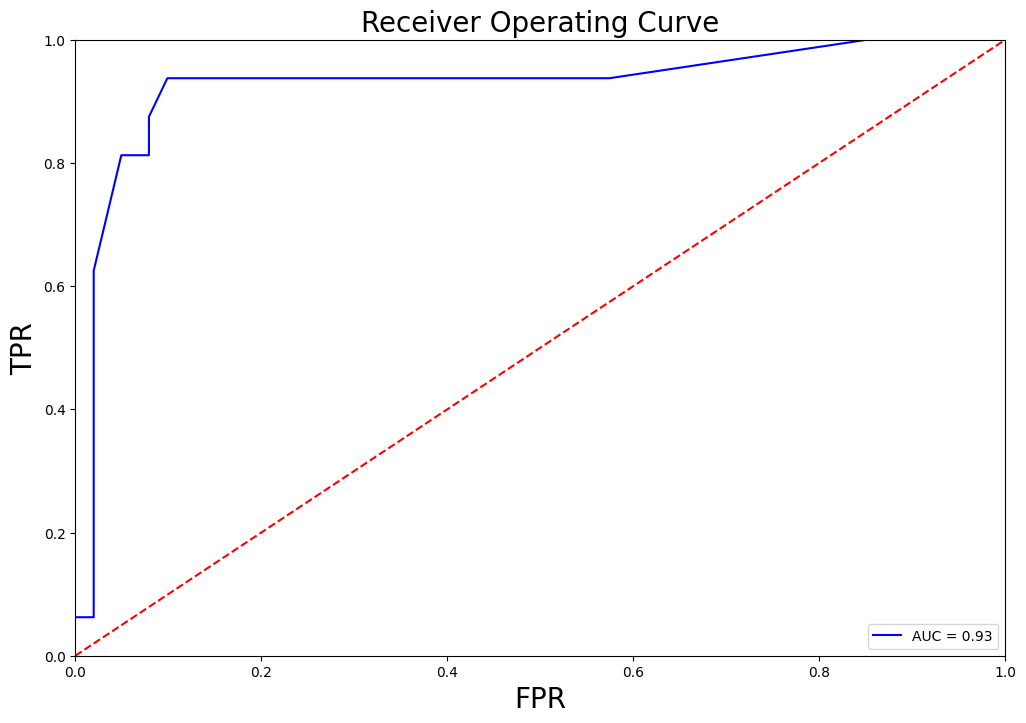

In [47]:
def roc_curve(y_true, y_score):
    """
    Arguments:
    y_true: ground truth labels with size (n, )
    y_score: the probability vector (n, )

    Returns:
    auc: area under the curve (AUC).
    tpr_l: a list of true positive rate (TPR) values for each scanned threshold.
    fpr_l: a list of false positive rate (FPR) values for each scanned threshold.
    thresholds: the scanned thresholds sorted descendingly.
    """
    # List of distinct values in y_score, sorted descendingly.
    thresholds = reversed(sorted(set(y_score.flatten())))
    tpr_l, fpr_l = [], []

    for threshold in thresholds:
    # Apply thresholding
        y_thresholded = (y_score >= threshold)

        # true positives count
        tp = np.sum(y_true & y_thresholded)
        # true negatives count
        tn = np.sum((~y_true) & (~y_thresholded))
        # false positives count
        fp = np.sum((~y_true) & y_thresholded)
        # false negatives count
        fn = np.sum(y_true & (~y_thresholded))

        # true positive rate
        tpr =  tp / (tp + fn)
        # false positive rate
        fpr =  fp / (tn + fp)

        tpr_l.append(tpr)
        fpr_l.append(fpr)

    # Compute AUC using Trapezoidal rule
    auc = np.trapz(tpr_l, fpr_l)
    return auc, tpr_l, fpr_l, thresholds

# unweighted
y_score = class_prob(train_forest, X_test_rf.to_numpy())
auc, tpr, fpr, th = roc_curve(y_test_rf, y_score)

print(auc)
plt.figure(figsize=(12,8))
plt.title(f"Receiver Operating Curve", size=20)
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.show()

0.948019801980198


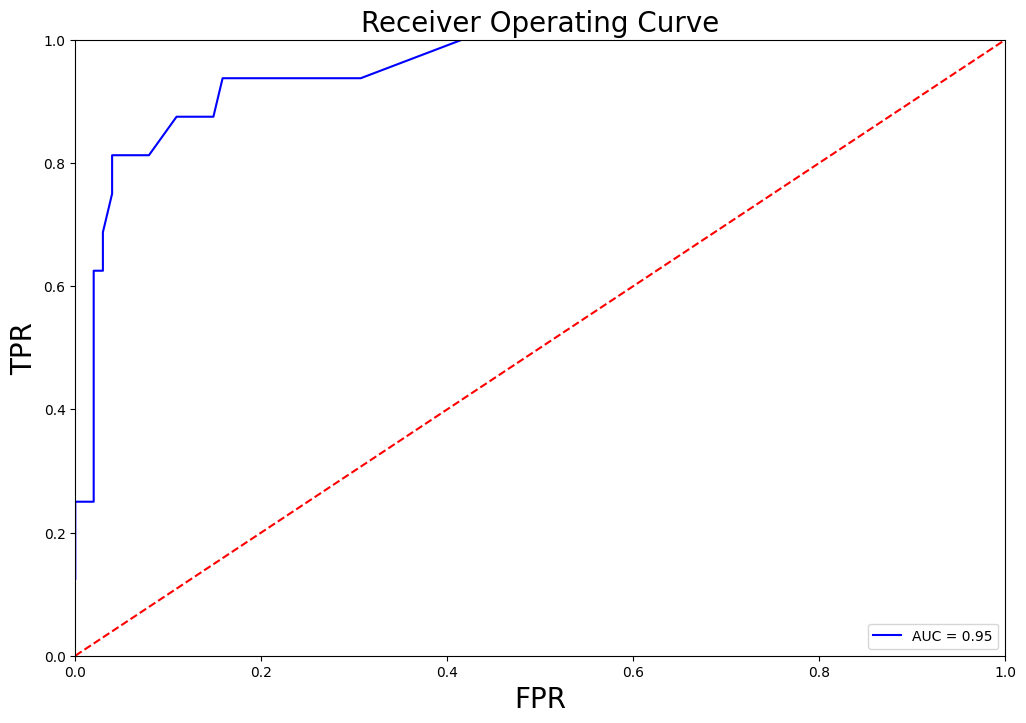

In [48]:
# weighted
y_score_w = class_prob(train_forest_weighted, X_test_rf.to_numpy())
auc, tpr, fpr, th = roc_curve(y_test_rf, y_score_w)

print(auc)
plt.figure(figsize=(12,8))
plt.title(f"Receiver Operating Curve", size=20)
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.show()

0.6208830782209107


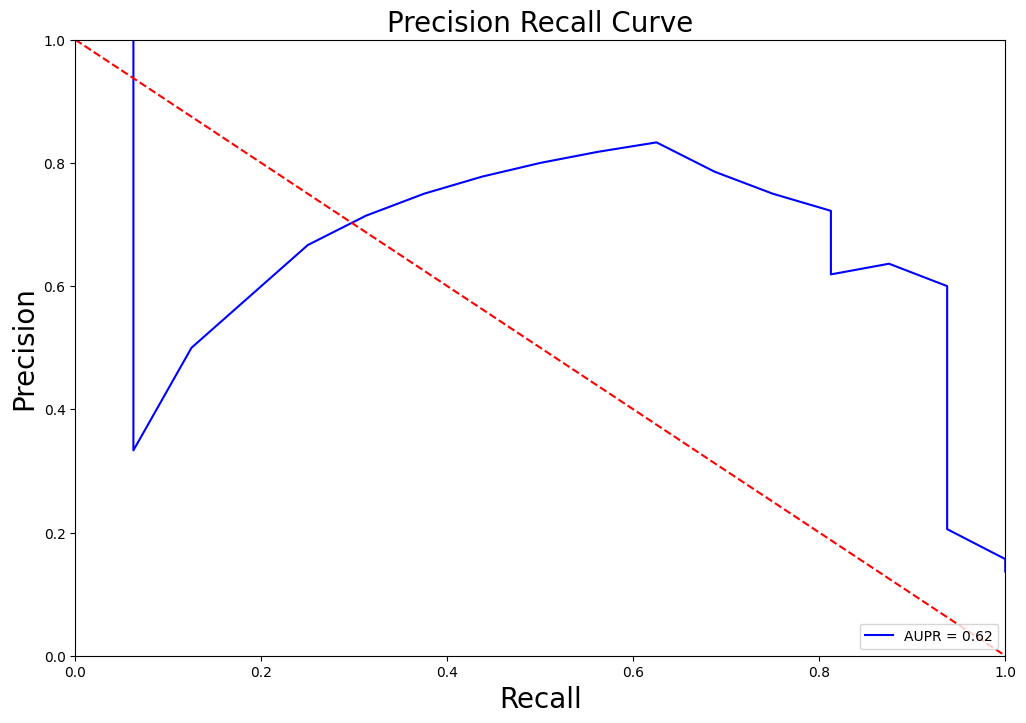

In [49]:
# Now we need to calculate the precision-recall curve.
# For convenience we redifine our precision and recall functions

def precision_pr(y_score, y_test):
    
    TP = np.sum((y_score==1) & (y_test==1))
    FP = np.sum((y_score==1) & (y_test==0))
    
    return TP / (TP + FP)

def recall_pr(y_score, y_test):
    
    TP = np.sum((y_score==1) & (y_test==1))
    FN = np.sum((y_score==0) & (y_test==1))
    
    return TP / (TP + FN)

# Note we essentially copy the roc_curve function but calculate precision and recall instead.

def pr_curve(rf, X, y_true):
    
    y_pred = class_prob(rf, X.to_numpy())
    precision_list = []
    recall_list = []
    
    # We want the values in descending order
    thresholds = reversed(sorted(set(y_pred.flatten())))
    
    for threshold in thresholds:
        y_score = np.where(y_pred >= threshold, 1, 0)
        
        pr = precision_pr(y_score, y_true)
        re = recall_pr(y_score, y_true)
        
        precision_list.append(pr)
        recall_list.append(re)
    
    aupr = np.trapz(precision_list, recall_list)
    
    return aupr, precision_list, recall_list

# unweighted
aupr, pr_l, re_l = pr_curve(train_forest, X_test_rf, y_test_rf)
print(aupr)
plt.figure(figsize=(12,8))
plt.title(f"Precision Recall Curve", size=20)
plt.plot(re_l, pr_l, 'b', label = f'AUPR = {aupr:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [1, 0],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision', size=20)
plt.xlabel("Recall", size=20)
plt.show()

0.9772727272727273


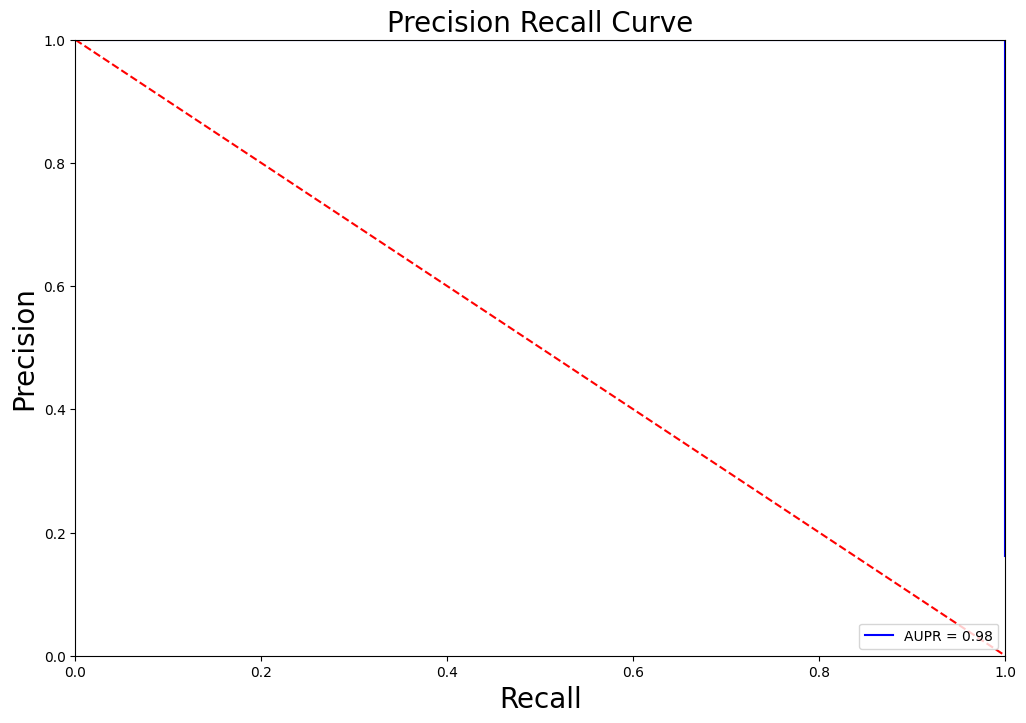

In [50]:
# weighted

aupr_w, pr_l_w, re_l_w = pr_curve(train_forest_weighted, X_train_rf, y_train_rf)

print(aupr_w)
plt.figure(figsize=(12,8))
plt.title(f"Precision Recall Curve", size=20)
plt.plot(re_l_w, pr_l_w, 'b', label = f'AUPR = {aupr_w:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [1, 0],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision', size=20)
plt.xlabel("Recall", size=20)
plt.show()

It is clear to see that in both cases (the ROC curve and the Precision Recall Curve) the weighted bootstrap random forest classifier performs much better than the standard random forest classifier on the test data set. Both curves are more right angular and so better follow the ideal curve. Plus, the area under both curves are larger in the weighted case - which further reinforce our conclusion that the weighted bootstrap random forest classifier is better.

#### 2.2	Support Vector Machine (SVM) (30 marks)
2.2.1

In [51]:
# We use the same data set that we have cleaned in the random forest task. 
# Except it is convenient to change the zeros to negative ones in this case.

train_data_svm_clean = train_data_rf_clean
test_data_svm_clean = test_data_rf_clean

X_train_svm = standardise(train_data_svm_clean.iloc[:, :13].to_numpy())
y_train_svm = train_data_svm_clean.loc[:, "diabetes"].to_numpy().astype(float)

# We need to add a column of ones at the end of X to account for the intercept.
X_train_svm = np.hstack((X_train_svm, np.ones((len(X_train_svm),1)) ))
y_train_svm[y_train_svm==0] = -1.0

X_test_svm = standardise(test_data_svm_clean.iloc[:, :13].to_numpy())
X_test_svm = np.hstack((X_test_svm, np.ones((len(X_test_svm),1)) ))  
y_test_svm = test_data_svm_clean.loc[:, "diabetes"].to_numpy().astype(float)

y_test_svm[y_test_svm==0] = -1.0

Now that we have our dataset we can train our SVM classifier by minimising the hinge loss function which we derived in the notes as being: 

$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \lambda \sum_{i=1}^n \max \bigg( 0, 1-y_i (x^{(i)} \cdot \boldsymbol w  + b) \bigg) \, .
$$

We will aim to minimise this using stochastic gradient descent. So, we need to define functions just as we did in the problem sheet.

In [79]:
# w are the weights, and lam is the hardness parameter which we will fine tune later on.

def compute_cost(w, X, y, lam=1e5):
    n = X.shape[0]
    distances = 1 - y * (X @ w)
    distances[distances < 0] = 0
    hinge = lam * distances.mean()

    # calculate cost
    return 0.5 * np.dot(w, w) + hinge

# Calculate gradient of cost, in batches to save computational time and effort.

def calculate_cost_gradient(w, X_batch, y_batch, lam=1e6):
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w))

    we = w.copy() # So as not to overwrite w
    we[-1] = 0 # So as not to have b in its derivative when adding the weights in di

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = we # derivative of first term
        else:
            di = we - (lam * y_batch[ind] * X_batch[ind])
        dw += di

    return dw/len(y_batch)  # average

Now we can perform SGD on the weights. This takes the form:

$$
\boldsymbol w = \boldsymbol w - \alpha \frac{\partial \mathcal L}{\partial \boldsymbol w}
$$

where $\alpha$ is the learning rate. Once we have the weights we can predict the class of $\hat{y}$ by checking the sign of $x_{in} \cdot w + b$.

In [80]:
# This function performs the gradient descent formula as discussed above and returns the optimal vector of weights.

def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, lam=1e6, print_outcome=False):
  
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    
    # initialise starting cost as infinity
    prev_cost = np.inf
  
  
    # stochastic gradient descent
    indices = np.arange(len(y))

    for iteration in range(1, max_iterations):
    # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]
    
        for xi, yi in zip(X, y):
            descent = calculate_cost_gradient(weights, xi, yi, lam)
            weights = weights - (learning_rate * descent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost(weights, X, y, lam)
            
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
              
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights
        
    prev_cost = cost
    nth += 1
  
    return weights

In [81]:
# Find the predicted values and create a new accuracy measure which we will use to fine tune the hyperparameter.

def accuracy_svm(w, X, y):
    y_pred = np.sign(X @ w)
    return np.mean(y_pred == y)

Now as usual we conduct a T-fold cross-validation search to fine tune the hyperparameter, in this case the hardness parameter lambda.

In [82]:
# We define cross_val_svm which in which we call cross_val_split to get the fold indexes.

def cross_val_svm(data, num_folds, lam):
    folds = cross_val_split(data.shape[0], num_folds)

    train_scores = []
    val_scores = []

    for i in range(len(folds)):
        #print('Fold', i+1)

        val_indices = folds[i]
        # define the training set
        train_indices = list(set(range(data.shape[0])) - set(val_indices))

        X_train = standardise(data[train_indices,  :-1])
        y_train = data[train_indices, -1]
        y_train[y_train == 0] = -1.0

        # define the validation set
        X_val = standardise(data[val_indices,  :-1])
        y_val = data[val_indices, -1] 
        y_val[y_val == 0] = -1.0

        # insert 1 in every row for intercept b
        X_train = np.hstack((X_train, np.ones((len(X_train),1)) ))
        X_val = np.hstack((X_val, np.ones((len(X_val),1)) ))  

        # train the model
        w = sgd(X_train, y_train, max_iterations=1025, stop_criterion=0.01, lam=lam, learning_rate=1e-5)
        #print("Training finished.")

        # evaluate
        train_score = accuracy_svm(w, X_train, y_train)
        val_score = accuracy_svm(w, X_val, y_val)
        #print("Accuracy on training set #{}: {}".format(i+1, train_score))
        #print("Accuracy on validation set #{}: {}".format(i+1, val_score))

        train_scores.append(train_score)
        val_scores.append(val_score)

    return train_scores, val_scores

print(cross_val_svm(train_data_svm_clean.to_numpy(), 4, 1e6))

([0.9121951219512195, 0.8439024390243902, 0.8926829268292683, 0.9024390243902439], [0.9264705882352942, 0.8676470588235294, 0.75, 0.8529411764705882])


In [83]:
# Now we do a grid search to find the best lambda and store all the MSE's in an array called lam_arr.

def svm_grid_search(data, num_folds, lam_range):
    
    best_lam_score = 0
    best_lam = 0
    lam_arr = []
    
    for lam in lam_range:
        lam_score = np.mean(cross_val_svm(data, num_folds, lam)[1])
        lam_arr.append(lam_score)
        if lam_score > best_lam_score:
            best_lam_score, best_lam = lam_score, lam
            
    
    print("The best lambda is {} which gives us an accuracy of {}".format(best_lam, best_lam_score))
    
    return best_lam, lam_arr

The best lambda is 25000 which gives us an accuracy of 0.9044117647058824


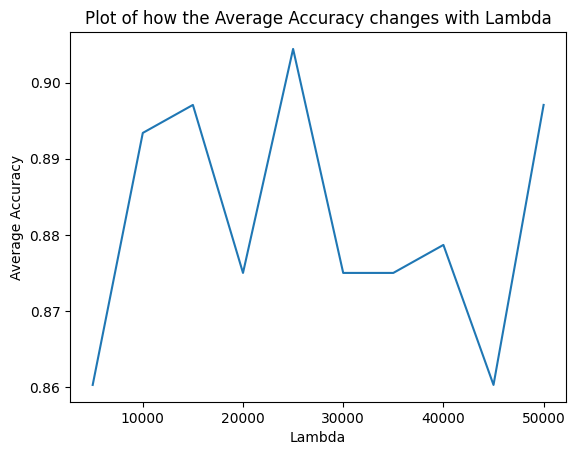

In [84]:
# Let's plot our results.
lam_arr = svm_grid_search(train_data_svm_clean.to_numpy(), 4, np.arange(5000, 55000, 5000))[1]
lam_range = np.arange(5000, 55000, 5000)
plt.plot(lam_range, lam_arr)
plt.title("Plot of how the Average Accuracy changes with Lambda")
plt.ylabel('Average Accuracy')
plt.xlabel("Lambda")
plt.show()

If $\lambda$ is set to a very large value, we will have a more complex decision boundary and the SVM will prioritize classifying every training example correctly. This can lead to overfitting, and thus poor generalization. On the other hand, setting $\lambda$ to a very small value will result in a wider margin and a simpler decision boundary. This can cause underfitting, where the model is not complex enough to capture the underlying patterns in the data.

2.2.2

To calculate the cosine of the angle between the hyperplanes, we can calculate the angle between the cosines of the weights corresponding to each hyperplane. Because they are normal to the hyperplane. Below, we create a function called `cosine` which puts the weights of each lambda from $\textbf{2.2.1}$ into an array. It then calculates the cosines between them using the formula relating the dot product and vector norms and finally stores them in a matrix. We can use this matrix to plot a heatmap.

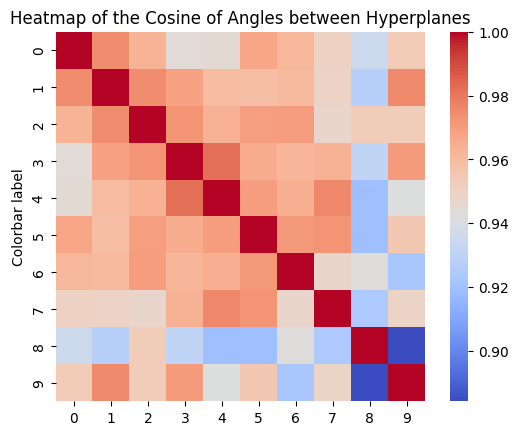

In [85]:
def cosine(X, y, lam_range):
    
    n_lam = len(lam_range)
    
    # We initialise with ones because the diagonals of this matrix will be one.
    # The angle between a hyperplane and itself is 0!
    cosine_mat = np.ones((n_lam, n_lam))
    
    # create weights matrix
    weights = np.zeros((n_lam, X.shape[1]))
    for i, lam in enumerate(lam_range):
        weights[i] = sgd(X, y, lam=lam)
    
    # compute cosine similarities
    norms = np.linalg.norm(weights, axis=1)
    norms_mat = np.outer(norms, norms)
    dot_products = np.matmul(weights, weights.T)
    
    # What we are doing here is changing all the non-diagonal entries in the cosine matrix
    cosine_mat[~np.eye(n_lam, dtype=bool)] = dot_products[~np.eye(n_lam, dtype=bool)] / norms_mat[~np.eye(n_lam, dtype=bool)]
    
    return cosine_mat


cosine_mat = cosine(X_train_svm, y_train_svm, np.arange(5000, 55000, 5000))
heatmap = sns.heatmap(cosine_mat, square=True, cmap='coolwarm')
heatmap.set_title("Heatmap of the Cosine of Angles between Hyperplanes")
heatmap.set_ylabel("Colorbar label")

plt.show()



The general trend is that as the difference between the lambdas increases the cosine similarity decreases. There are exceptions to this trend but if we tested a larger range of lambdas the relationship will hold better.

2.2.3

In [91]:
# We have to define precision_svm, recall_svm and F-score svm like we did for random forests.

def precision_svm(w, X, y):

    y_pred = np.sign(X @ w)
    
    TP = np.sum((y_pred==1.0) & (y==1.0))
    FP = np.sum((y_pred==1.0) & (y==-1.0))
    
    return TP / (TP + FP)

def recall_svm(w, X, y):
    
    y_pred = np.sign(X @ w)
    
    TP = np.sum((y_pred==1.0) & (y==1.0))
    FN = np.sum((y_pred==-1.0) & (y==1.0))
    
    return TP / (TP + FN)

def F_score_svm(w, X, y):
    
    num = precision_svm(w, X, y) * recall_svm(w, X, y)
    den = precision_svm(w, X, y) + recall_svm(w, X, y)
    
    return 2 * num / den

weights = sgd(X_train_svm, y_train_svm, lam=25000)
print(accuracy_svm(weights, X_test_svm, y_test_svm))
print(precision_svm(weights, X_test_svm, y_test_svm))
print(F_score_svm(weights, X_test_svm, y_test_svm))

0.9401709401709402
0.7647058823529411
0.787878787878788


2.2.4

In [87]:
# Firstly we need a function to calculate the sigmoid kernel matrix between two matrices. 


def kernel_matrix(X1, X2, sigma=1):
    """
    Computes the kernel matrix for the hyperbolic tangent function between two matrices X1 and X2.

    Parameters:
        X1 (numpy.ndarray): A matrix of shape (n_samples_X1, n_features).
        X2 (numpy.ndarray): A matrix of shape (n_samples_X2, n_features).
        sigma (float): A parameter of the hyperbolic tangent function.

    Returns:
        numpy.ndarray: A kernel matrix of shape (n_samples_X1, n_samples_X2).
    """

    n1, m1 = X1.shape
    n2, m2 = X2.shape
    kernel = np.zeros((n1, n2))

    # Compute the kernel matrix using the hyperbolic tangent function #
    for i in range(n2):
        
        dot_product = np.dot(X1, X2[i, :])
        kernel[:, i] = np.tanh(sigma * dot_product + 1)


    return kernel

In [88]:
# Now we compute the cost and the gradient of the cost for the kernelised version.

def compute_cost_kernel(u, K, y, lam=1e3,intercept=0):
    
    distances = 1 - (y)*(K@u + intercept) # we keep the intercept separate
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = lam * distances.mean()

    # calculate cost
    return 0.5 * np.dot(u, K@u) + hinge

# In this function we want to find the gradient with respect to the intercept as well.
# So we initialise the intercept at zero and take away lam * y_batch[ind], whenever the distance is positive.

def calculate_cost_gradient_kernel(u, K_batch, y_batch, lam=1e3,intercept=0):

    # if only one example is passed
    if type(y_batch) == np.float64 or type(y_batch) == np.int32:
        y_batch = np.asarray([y_batch])
        K_batch = np.asarray([K_batch])  # gives multidimensional array
    
    distance = 1 - (y_batch * (K_batch @ u + intercept))
    dw = np.zeros(len(u))
    d_int = 0

    # define the gradient with the hinge loss #
    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = K_batch@u
            di_int = 0
        else:
            di = K_batch@u - (lam * y_batch[ind] * K_batch[ind])
            di_int = - lam * y_batch[ind]
        
        dw += di
        d_int += di_int

    return dw/len(y_batch), d_int/len(y_batch)

In [89]:
# Now we can perform gradient descent.

def sgd_kernel(K, y, batch_size=32, max_iterations=4000, stop_criterion=0.001, learning_rate=1e-4, lam=1e3, print_outcome=False):

    # initialise zero u and intercept
    u = np.zeros(K.shape[1])
    intercept=0
    
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
    
    # stochastic gradient descent
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        K_b, y_b = K[batch_idx], y[batch_idx]
        
        # We have to edit this part of the function so that we can descend down both u and b.
        for ki, yi in zip(K_b, y_b):
            du, d_int = calculate_cost_gradient_kernel(u, ki, yi, lam, intercept) # <-- SOLUTION
            u = u - (learning_rate * du)
            intercept = intercept - (learning_rate * d_int)
        
        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost_kernel(u, K, y, lam, intercept)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return u, intercept
            
            prev_cost = cost
            nth += 1
    
    return u, intercept

In [90]:
lam = 10

for sigma in [0.01,0.1,1,2]:
    
    print('For sigma = ' + str(sigma))
    K_train = kernel_matrix(X_train_svm, X_train_svm, sigma)

    u,b = sgd_kernel(K_train, y_train_svm, batch_size=128, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, lam=lam, print_outcome=False)
    
    print(b)

For sigma = 0.01
-0.9753999999999089
For sigma = 0.1
-0.3452999999999783
For sigma = 1
-1.9143999999998056
For sigma = 2
-1.9053999999998066


2.2.5

In [78]:
lam = 10

for sigma in [0.01,0.1,1,2]:
    
    print('For sigma = ' + str(sigma))
    K_train = kernel_matrix(X_train_svm, X_train_svm, sigma)

    u,b = sgd_kernel(K_train, y_train_svm, batch_size=128, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, lam=lam, print_outcome=False)
    
    def accuracy_svm_int(u, X, y, sigma, b):
        K_test = kernel_matrix(X, X_train_svm, sigma)

        y_pred = np.sign(K_test @ u + b)
        return np.mean(y_pred == y)
    
    def precision_svm_int(u, X, y, sigma, b):
        
        K_test = kernel_matrix(X, X_train_svm, sigma)

        y_pred = np.sign(K_test @ u + b)

        TP = np.sum((y_pred==1.0) & (y==1.0))
        FP = np.sum((y_pred==1.0) & (y==-1.0))

        return TP / (TP + FP)

    def recall_svm_int(u, X, y, sigma, b):

        K_test = kernel_matrix(X, X_train_svm, sigma)

        y_pred = np.sign(K_test @ u + b)

        TP = np.sum((y_pred==1.0) & (y==1.0))
        FN = np.sum((y_pred==-1.0) & (y==1.0))

        return TP / (TP + FN)

    def F_score_svm_int(u, X, y, sigma, b):

        num = precision_svm_int(u, X, y, sigma, b) * recall_svm_int(u, X, y, sigma, b)
        den = precision_svm_int(u, X, y, sigma, b) + recall_svm_int(u, X, y, sigma, b)

        return 2 * num / den
    
    print("Accuracy:{}".format(accuracy_svm_int(u, X_test_svm, y_test_svm, sigma, b)))
    print("Precision:{}".format(precision_svm_int(u, X_test_svm, y_test_svm, sigma, b)))
    print("F-score:{}".format(F_score_svm_int(u, X_test_svm, y_test_svm, sigma, b)))

For sigma = 0.01
Accuracy:0.8632478632478633
Precision:nan
F-score:nan
For sigma = 0.1


/var/folders/5v/4t_gvj7152l67p5xd79r0d3m0000gn/T/ipykernel_57272/4133003935.py:25: RuntimeWarning: invalid value encountered in long_scalars
  return TP / (TP + FP)


Accuracy:0.9316239316239316
Precision:0.8333333333333334
F-score:0.7142857142857143
For sigma = 1
Accuracy:0.7863247863247863
Precision:0.36363636363636365
F-score:0.48979591836734687
For sigma = 2
Accuracy:0.7948717948717948
Precision:0.38235294117647056
F-score:0.52


The precision and F-score are generally lower than before for most $\sigma$'s. The exception being when $\sigma = 0.1$ which gives better accuracy, precision and F-scores as the linearised SVM. So we can conclude that the data follow a distribution which is easily separable by the sigmoid kernel function with $\sigma = 0.1$